In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import easyocr
import keras_ocr

plt.style.use("ggplot")

## EasyOCR test

In [40]:
reader = easyocr.Reader(["en"])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [126]:
result = reader.readtext("./IMG_0863.JPEG")

In [127]:
result = pd.DataFrame(result, columns=["bbox", "text", "conf"])

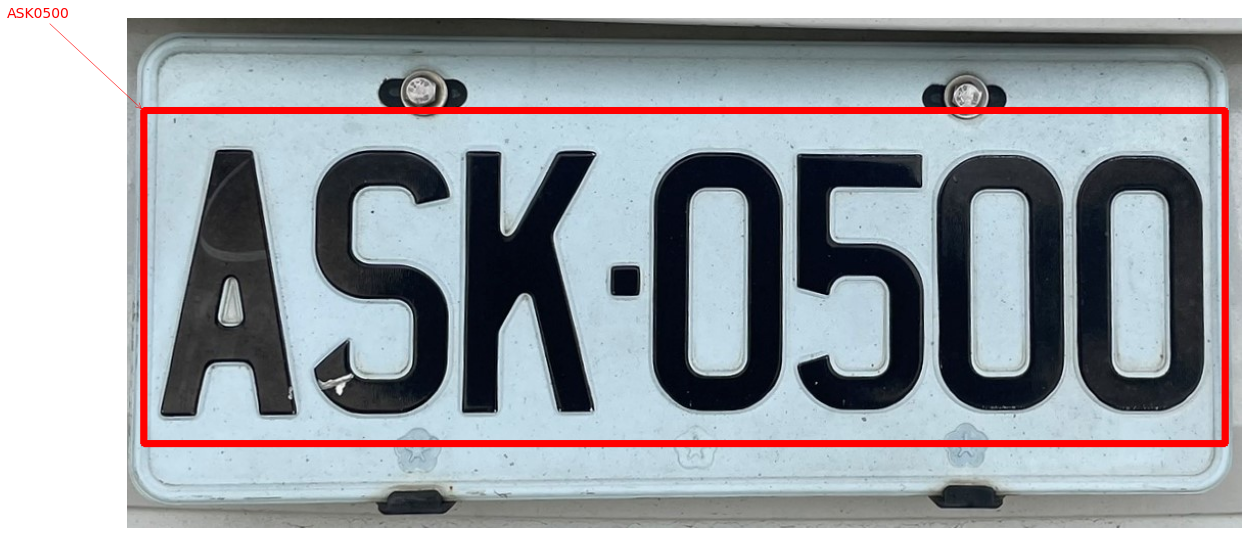

In [128]:
fig, ax = plt.subplots(figsize=(20, 20))
easy_result = result[["text", "bbox"]].values.tolist()
easy_result = [(x[0], np.array(x[1])) for x in easy_result]
keras_ocr.tools.drawAnnotations(plt.imread("./IMG_0863.JPEG"), easy_result, ax)
plt.show()

## keras_ocr test

In [53]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for C:\Users\kc.hsu\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\kc.hsu\.keras-ocr\crnn_kurapan.h5


In [117]:
result = pipeline.recognize(["./IMG_0864.JPEG"])

1/1 [==============================] - 0s 209ms/step


In [118]:
df = pd.DataFrame(result[0], columns=["text", "bbox"])

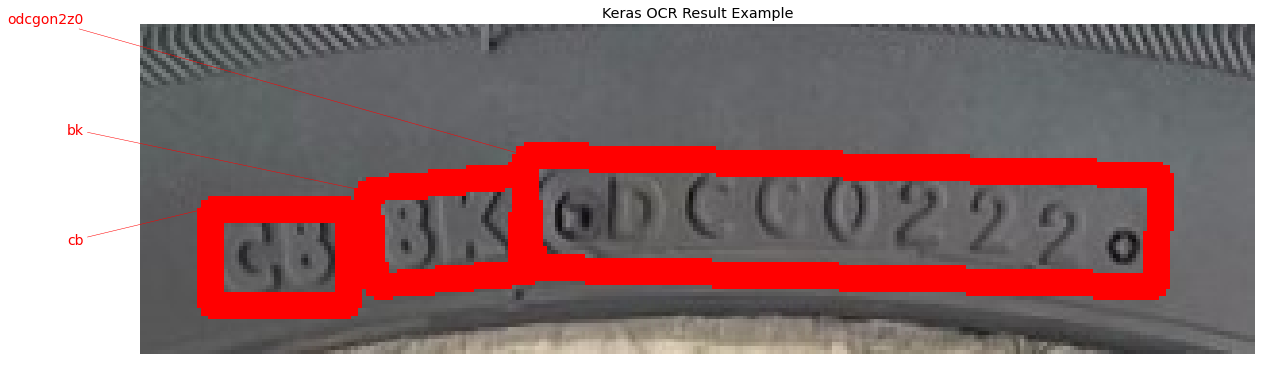

In [119]:
fig, ax = plt.subplots(figsize=(20, 20))
keras_ocr.tools.drawAnnotations(plt.imread("./IMG_0864.JPEG"), result[0], ax)
ax.set_title('Keras OCR Result Example')
plt.show()